In [130]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [131]:
# Image Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [132]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [133]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [134]:
x_train = train_datagen.flow_from_directory(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\Veg-dataset\train_set',target_size = (128,128),batch_size=8,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\Veg-dataset\train_set',target_size = (128,128),batch_size=8,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 11386 images belonging to 9 classes.


In [135]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [136]:
x_test.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [137]:
# CNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [138]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [139]:
# Hidden Layers

model.add(Dense(128 ,activation='relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(30,activation = 'relu'))


In [140]:
# Output Layer

model.add(Dense(9,activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 127008)            0         
                                                                 
 dense_31 (Dense)            (None, 128)               16257152  
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 30)                1950      
                                                      

In [141]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [142]:
#model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
#model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
model.fit(x_train,steps_per_epoch=11386//16,validation_data=x_test,validation_steps=3416//8,epochs=10)

Epoch 1/10
711/711 [==============================] - 75s 105ms/step - loss: 1.7240 - accuracy: 0.3738 - val_loss: 1.1137 - val_accuracy: 0.6127
Epoch 2/10
711/711 [==============================] - 70s 98ms/step - loss: 1.0008 - accuracy: 0.6514 - val_loss: 0.8469 - val_accuracy: 0.6701
Epoch 3/10
711/711 [==============================] - 72s 101ms/step - loss: 0.7712 - accuracy: 0.7269 - val_loss: 0.9147 - val_accuracy: 0.6733
Epoch 4/10
711/711 [==============================] - 69s 97ms/step - loss: 0.6411 - accuracy: 0.7707 - val_loss: 0.4651 - val_accuracy: 0.8311
Epoch 5/10
711/711 [==============================] - 81s 115ms/step - loss: 0.5853 - accuracy: 0.7927 - val_loss: 0.4442 - val_accuracy: 0.8299
Epoch 6/10
711/711 [==============================] - 72s 101ms/step - loss: 0.5309 - accuracy: 0.8138 - val_loss: 0.4481 - val_accuracy: 0.8235
Epoch 7/10
711/711 [==============================] - 71s 99ms/step - loss: 0.4904 - accuracy: 0.8263 - val_loss: 0.4466 - val_accur

In [143]:
# Saving The Model

model.save("vegetables.h5")

In [144]:
pwd

'C:\\Users\\KAVINYUVA\\Downloads'

In [145]:
#Testing the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [146]:
#load the model
model = load_model('vegetables.h5')

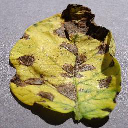

In [147]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\Veg-dataset\test_set\Potato___Early_blight\b7157976-61c2-4366-87c5-e3de23aa7c10___RS_Early.B 7227.jpg',target_size=(128,128))
img

In [148]:
x=image.img_to_array(img)

In [149]:
x

array([[[172., 169., 180.],
        [168., 165., 176.],
        [168., 165., 176.],
        ...,
        [191., 189., 200.],
        [180., 178., 189.],
        [192., 190., 201.]],

       [[174., 171., 182.],
        [169., 166., 177.],
        [161., 158., 169.],
        ...,
        [186., 184., 195.],
        [185., 183., 194.],
        [189., 187., 198.]],

       [[174., 171., 182.],
        [169., 166., 177.],
        [163., 160., 171.],
        ...,
        [181., 179., 190.],
        [188., 186., 197.],
        [182., 180., 191.]],

       ...,

       [[131., 121., 130.],
        [154., 144., 153.],
        [154., 147., 155.],
        ...,
        [138., 135., 146.],
        [145., 142., 153.],
        [154., 151., 162.]],

       [[142., 130., 140.],
        [128., 118., 127.],
        [135., 128., 136.],
        ...,
        [148., 145., 156.],
        [160., 157., 168.],
        [154., 151., 162.]],

       [[124., 112., 122.],
        [132., 122., 131.],
        [123., 1

In [150]:
x.ndim

3

In [151]:
x.shape

(128, 128, 3)

In [152]:
x=np.expand_dims(x,axis=0)

In [153]:
x

array([[[[172., 169., 180.],
         [168., 165., 176.],
         [168., 165., 176.],
         ...,
         [191., 189., 200.],
         [180., 178., 189.],
         [192., 190., 201.]],

        [[174., 171., 182.],
         [169., 166., 177.],
         [161., 158., 169.],
         ...,
         [186., 184., 195.],
         [185., 183., 194.],
         [189., 187., 198.]],

        [[174., 171., 182.],
         [169., 166., 177.],
         [163., 160., 171.],
         ...,
         [181., 179., 190.],
         [188., 186., 197.],
         [182., 180., 191.]],

        ...,

        [[131., 121., 130.],
         [154., 144., 153.],
         [154., 147., 155.],
         ...,
         [138., 135., 146.],
         [145., 142., 153.],
         [154., 151., 162.]],

        [[142., 130., 140.],
         [128., 118., 127.],
         [135., 128., 136.],
         ...,
         [148., 145., 156.],
         [160., 157., 168.],
         [154., 151., 162.]],

        [[124., 112., 122.],
       

In [154]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 109ms/step


In [155]:
y

array([2], dtype=int64)

In [156]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [157]:
index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

In [158]:
index[y[0]]

'Potato___Early_blight'

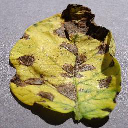

In [159]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\Veg-dataset\test_set\Potato___Early_blight\b7157976-61c2-4366-87c5-e3de23aa7c10___RS_Early.B 7227.jpg',target_size=(128,128))
img

In [160]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[y[0]]

1/1 [==============================] - 0s 18ms/step


'Potato___Early_blight'

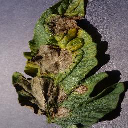

In [161]:
img = image.load_img(r'C:\Users\KAVINYUVA\Downloads\SmartInternzVideo\Veg-dataset\test_set\Tomato___Late_blight\aff90d5c-a3f2-445a-b125-717a00b21fb8___RS_Late.B 6624.jpg',target_size=(128,128))
img

In [162]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y= np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 31ms/step


'Tomato___Septoria_leaf_spot'